In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# Setting the colors:

palette_1 = sns.diverging_palette(220, 7, s = 60, l = 50, n=8)
sns.set(palette = 'YlGnBu')

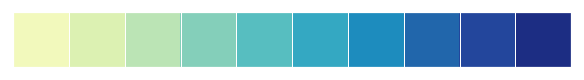

In [3]:
sns.palplot(sns.color_palette('YlGnBu', 10))

In [4]:
column_list = ['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender', 'starttime',
                'stoptime', 'tripduration', 'temperature', 'events', 'from_station_id',
                'dpcapacity_start', 'to_station_id', 'dpcapacity_end']

In [5]:
data = pd.read_csv("Divvy_Bikeshare.csv", index_col = False, usecols = column_list)

In [6]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

In [7]:
# Cleaning/Isolating some Data

data_wthr = data.replace({'events': {'clear':0,
                                     'cloudy':1,
                                     'not clear':2,
                                     'rain or snow':3,
                                     'tstorms':4,
                                     'unknown':5}})

yr_2017 = pd.DataFrame(data_wthr.loc[data_wthr['year'] == 2017])

In [10]:
# Trying out a first model:

def forest_classifier(target):

    rfc = ensemble.RandomForestClassifier()

    X = yr_2017[['hour', 'tripduration', 'temperature', 'events']]
    Y = yr_2017[target].values
    
    rfc.fit(X, Y)
    
    return cross_val_score(rfc, X, Y, cv = 10)

In [10]:
forest_classifier('day')

array([0.16668977, 0.16935399, 0.15623574, 0.18895087, 0.14998817,
       0.13558892, 0.14960712, 0.15374212, 0.15525397, 0.15147499])

In [11]:
forest_classifier('gender')

array([0.67881462, 0.6196525 , 0.61295132, 0.66033289, 0.64258932,
       0.63716279, 0.6466364 , 0.62593443, 0.66862991, 0.66860174])

In [ ]:
def simpler_forest(target)

    rfc_1 = ensemble.RandomForestClassifier()